# Introducción al PCA en Python

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad lineal que se puede utilizar para extraer información de un espacio de alta dimensión proyectándolo en un subespacio de menor dimensión. Intenta preservar las partes esenciales que tienen más variación de los datos y eliminar las partes no esenciales con menos variación.

Las dimensiones no son más que características que representan los datos. Por ejemplo, una imagen de 28 X 28 tiene 784 elementos de imagen (píxeles) que son las dimensiones o características que juntas representan esa imagen.

Una cosa importante a tener en cuenta sobre el PCA es que es una técnica de reducción de dimensionalidad no supervisada, puedes agrupar los puntos de datos similares en base a la correlación de características entre ellos sin ninguna supervisión (o etiquetas), y aprenderás cómo lograr esto prácticamente usando Python en secciones posteriores de este tutorial.

Según Wikipedia, el PCA es un procedimiento estadístico que utiliza una transformación ortogonal para convertir un conjunto de observaciones de variables posiblemente correlacionadas (entidades cada una de las cuales asume varios valores numéricos) en un conjunto de valores de variables linealmente no correlacionadas llamadas componentes principales.

Nota: Características, Dimensiones y Variables se refieren a lo mismo. Encontrarás que se usan indistintamente.

# ¿Dónde puedes aplicar el PCA?

1. Visualización de Datos: Al trabajar en cualquier problema relacionado con datos, el desafío en el mundo actual es el enorme volumen de datos y las variables/características que definen esos datos. Para resolver un problema donde los datos son clave, necesitas una exploración extensa de los datos, como descubrir cómo están correlacionadas las variables o entender la distribución de algunas variables. Considerando que hay un gran número de variables o dimensiones a lo largo de las cuales se distribuyen los datos, la visualización puede ser un desafío y casi imposible.

Por lo tanto, el PCA puede hacer eso por ti, ya que proyecta los datos en una dimensión inferior, permitiéndote visualizar los datos en un espacio 2D o 3D con el ojo desnudo.

2. Acelerar un Algoritmo de Aprendizaje Automático (ML): Dado que la idea principal del PCA es la reducción de la dimensionalidad, puedes aprovechar eso para acelerar el tiempo de entrenamiento y prueba de tu algoritmo de aprendizaje automático, considerando que tus datos tienen muchas características y el aprendizaje del algoritmo de ML es demasiado lento.

A nivel abstracto, tomas un conjunto de datos con muchas características y simplificas ese conjunto de datos seleccionando algunos Componentes Principales de las características originales.

# ¿Qué es un Componente Principal?

Los componentes principales son clave en el PCA; representan lo que hay bajo la superficie de tus datos. En términos sencillos, cuando los datos se proyectan en una dimensión inferior (asume tres dimensiones) desde un espacio superior, las tres dimensiones no son más que los tres Componentes Principales que capturan (o contienen) la mayor parte de la varianza (información) de tus datos.

Los componentes principales tienen tanto dirección como magnitud. La dirección representa a lo largo de qué ejes principales los datos están más dispersos o tienen más varianza y la magnitud indica la cantidad de varianza que el Componente Principal captura de los datos cuando se proyecta sobre ese eje. Los componentes principales son una línea recta, y el primer componente principal contiene la mayor varianza en los datos. Cada componente principal subsiguiente es ortogonal al último y tiene una varianza menor. De esta manera, dado un conjunto de x variables correlacionadas sobre y muestras, logras un conjunto de u componentes principales no correlacionados sobre las mismas y muestras.

La razón por la que logras componentes principales no correlacionados a partir de las características originales es que las características correlacionadas contribuyen al mismo componente principal, reduciendo así las características de los datos originales en componentes principales no correlacionados; cada uno representando un conjunto diferente de características correlacionadas con diferentes cantidades de variación.

Cada componente principal representa un porcentaje de la variación total capturada de los datos.

En la clase de hoy, principalmente se aplicara PCA en dos casos de uso:

Visualización de Datos
Acelerar el algoritmo de ML
Para lograr las dos tareas anteriores, utilizarás dos famosos conjuntos de datos: Cáncer de Mama (numérico) y CIFAR - 10 (imagen).

# Entendiendo los Datos

Antes de proceder a cargar los datos, es bueno entender y observar los datos con los que vas a trabajar.

## Cáncer de Mama
El conjunto de datos de Cáncer de Mama es un conjunto de datos multivariante de valores reales que consta de dos clases, donde cada clase indica si un paciente tiene cáncer de mama o no. Las dos categorías son: maligno y benigno.

La clase maligna tiene 212 muestras, mientras que la clase benigna tiene 357 muestras.

Tiene 30 características compartidas en todas las clases: radio, textura, perímetro, área, suavidad, dimensión fractal, etc.

Puede cargalo con la ayuda de la biblioteca sklearn.

## CIFAR - 10

El conjunto de datos CIFAR-10 (Instituto Canadiense de Investigación Avanzada) consta de 60000 imágenes de 32x32x3 en color, divididas en diez clases, con 6000 imágenes por categoría.

El conjunto de datos incluye 50000 imágenes de entrenamiento y 10000 imágenes de prueba.

Las clases en el conjunto de datos son avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco, camión.

Puedes cargarlo con la ayuda de una biblioteca de aprendizaje profundo como Keras.


In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer_labels = cancer_data["target"]
cancer_labels.shape

(569,)

In [8]:
cancer_labels = np.reshape(cancer_labels,(cancer_labels.shape[0],1))

In [9]:
cancer_labels.shape

(569, 1)

In [10]:
cancer_info = cancer_data['data']
cancer_info.shape

(569, 30)

In [13]:
type(cancer_info)

numpy.ndarray

In [17]:
cancer_array = np.concatenate([cancer_info,cancer_labels], axis=1)
cancer_array.shape

(569, 31)

In [21]:
cancer_df = pd.DataFrame(cancer_array,columns=np.append(cancer_data['feature_names'],'target') )
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [27]:
data_values = cancer_df.loc[:,cancer_data['feature_names']].values
data_transform = StandardScaler().fit_transform(data_values)

In [30]:
data_values

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [29]:
data_transform

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [32]:
obj_pca = PCA(n_components=2)
pc_cancer = obj_pca.fit_transform(data_transform)

In [33]:
pc_cancer_data = pd.DataFrame(pc_cancer,columns=['Componente principal 1', 'Componente principal 2'])
pc_cancer_data.head()

,Componente principal 1,Componente principal 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [34]:
obj_pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

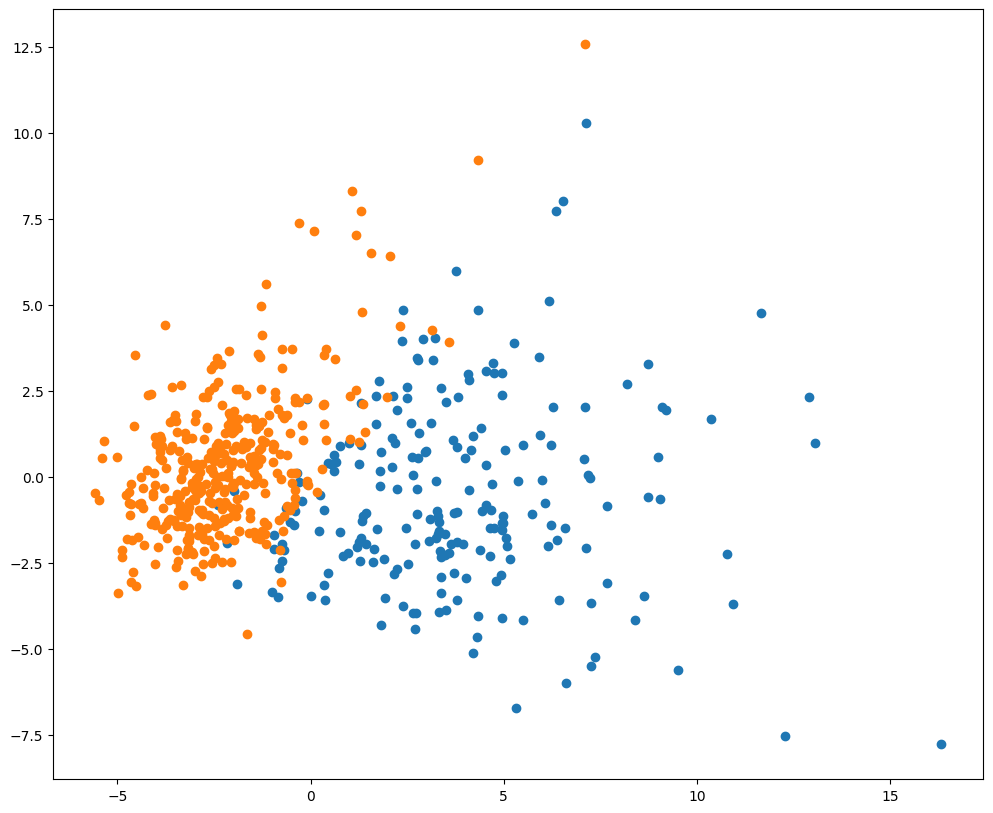

In [36]:
plt.figure(figsize=(12,10))
targets = [0,1]
colors = ['b','g']
for target, color in zip(targets,colors):
  index = cancer_df.target == target
  plt.scatter(pc_cancer_data.loc[index,'Componente principal 1'],pc_cancer_data.loc[index,'Componente principal 2'])
plt.show()

In [73]:
from keras.datasets import cifar10
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [38]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [39]:
x_train.shape

(50000, 32, 32, 3)

In [40]:
x_test.shape

(10000, 32, 32, 3)

In [41]:
y_train.shape

(50000, 1)

In [42]:
clases = np.unique(y_train)
print(clases)
len(clases)

[0 1 2 3 4 5 6 7 8 9]


10

In [43]:
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

Text(0.5, 1.0, 'ship')

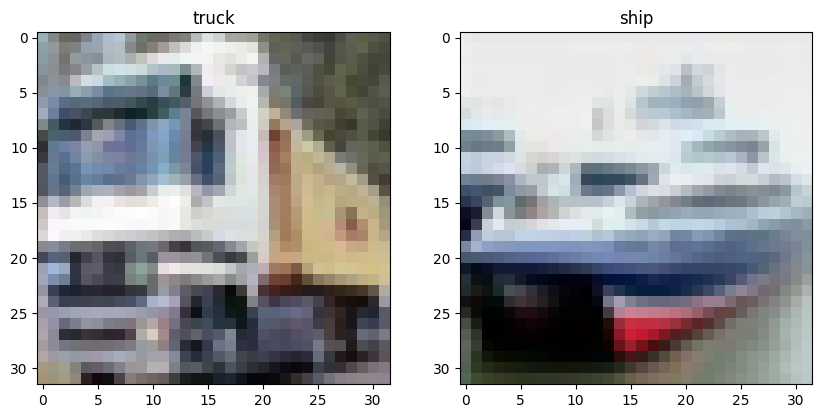

In [46]:
plt.figure(figsize= (10,10))

plt.subplot(121)
current_img = np.reshape(x_train[1], (32,32,3))
plt.imshow(current_img)
plt.title(label_dict[y_train[1][0]])

plt.subplot(122)
current_img = np.reshape(x_test[1], (32,32,3))
plt.imshow(current_img)
plt.title(label_dict[y_test[1][0]])

In [47]:
x_train = x_train/255.0

In [49]:
x_train.shape

(50000, 32, 32, 3)

In [50]:
x_train_res = x_train.reshape(-1,32*32*3)

In [51]:
x_train_res.shape

(50000, 3072)

In [ ]:
columnas = ['pixeles ' + str(i) for i in range(x_train_res.shape[1])]

In [55]:
df = pd.DataFrame(x_train_res, columns=columnas)

In [56]:
df.head()

,pixeles 0,pixeles 1,pixeles 2,pixeles 3,pixeles 4,pixeles 5,pixeles 6,pixeles 7,pixeles 8,pixeles 9,...,pixeles 3062,pixeles 3063,pixeles 3064,pixeles 3065,pixeles 3066,pixeles 3067,pixeles 3068,pixeles 3069,pixeles 3070,pixeles 3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725


In [57]:
df['target'] = y_train

In [58]:
df.head()

,pixeles 0,pixeles 1,pixeles 2,pixeles 3,pixeles 4,pixeles 5,pixeles 6,pixeles 7,pixeles 8,pixeles 9,...,pixeles 3063,pixeles 3064,pixeles 3065,pixeles 3066,pixeles 3067,pixeles 3068,pixeles 3069,pixeles 3070,pixeles 3071,target
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [59]:
obj_pca = PCA(n_components=2)
pc_df = obj_pca.fit_transform(df.iloc[:,:-1])

In [60]:
principal_component_Df = pd.DataFrame(pc_df, columns=['Componente 1', 'Componente 2'])
principal_component_Df.head()

,Componente 1,Componente 2
0,-6.401018,2.729039
1,0.829783,-0.949943
2,7.730200,-11.522102
3,-10.347817,0.010738
4,-2.625651,-4.969240


In [61]:
obj_pca.explained_variance_ratio_

array([0.2907663 , 0.11253144])

<ipython-input-63-fb72f3d41ef2>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: >

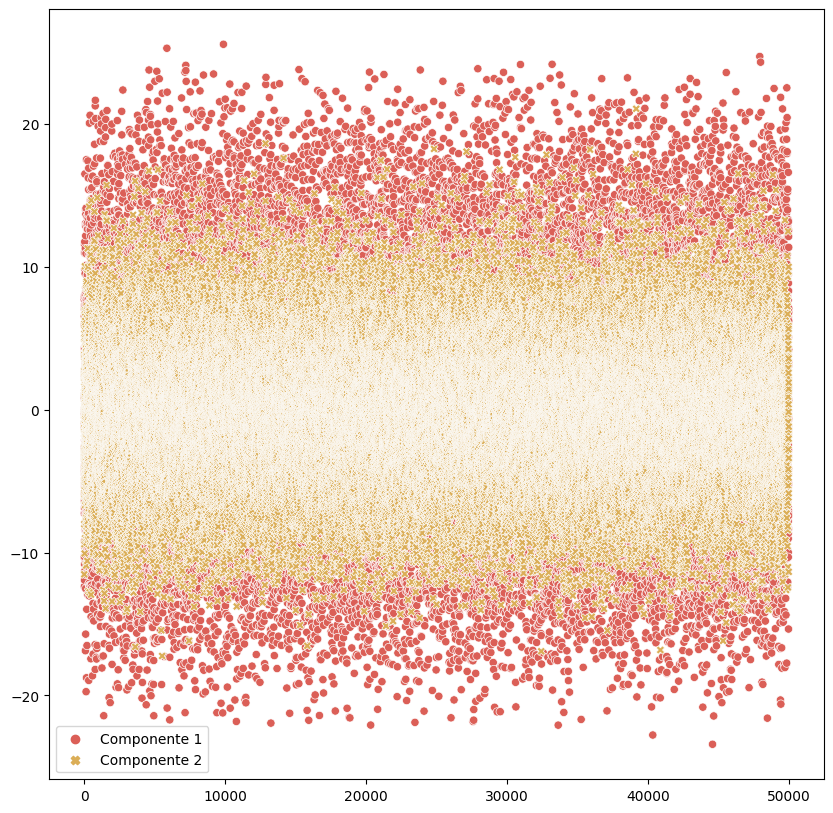

In [63]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data = principal_component_Df,
    palette= sns.color_palette("hls",10)
)

In [64]:
x_test = x_test/255.0

In [65]:
x_test = x_test.reshape(-1,32*32*3)

In [66]:
x_test.shape

(10000, 3072)

In [67]:
pca = PCA(0.9)

In [68]:
pca.fit(x_train_res)

PCA(n_components=0.9)

In [69]:
pca.n_components_

99

In [70]:
train_imag = pca.transform(x_train_res)
test_imag = pca.transform(x_test)

In [74]:
from keras.src.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [75]:
modelo = Sequential()
modelo.add(Dense(1500, activation='relu', input_shape=(99,)))
modelo.add(Dense(600, activation='relu'))
modelo.add(Dense(300, activation='relu'))
modelo.add(Dense(150, activation='relu'))
modelo.add(Dense(10, activation='softmax'))

modelo.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])

In [76]:
history = modelo.fit(train_imag,y_train, batch_size=20, epochs=15,validation_data=(test_imag,y_test))

Epoch 1/15
2500/2500 [==============================] - 61s 24ms/step - loss: 1.5892 - accuracy: 0.4373 - val_loss: 1.4459 - val_accuracy: 0.4843
Epoch 2/15
2500/2500 [==============================] - 52s 21ms/step - loss: 1.3210 - accuracy: 0.5323 - val_loss: 1.3294 - val_accuracy: 0.5277
Epoch 3/15
2500/2500 [==============================] - 55s 22ms/step - loss: 1.1765 - accuracy: 0.5840 - val_loss: 1.2860 - val_accuracy: 0.5463
Epoch 4/15
2500/2500 [==============================] - 52s 21ms/step - loss: 1.0532 - accuracy: 0.6262 - val_loss: 1.2872 - val_accuracy: 0.5477
Epoch 5/15
2500/2500 [==============================] - 56s 22ms/step - loss: 0.9307 - accuracy: 0.6697 - val_loss: 1.3284 - val_accuracy: 0.5587
Epoch 6/15
2500/2500 [==============================] - 54s 22ms/step - loss: 0.8177 - accuracy: 0.7091 - val_loss: 1.3498 - val_accuracy: 0.5588
Epoch 7/15
2500/2500 [==============================] - 54s 22ms/step - loss: 0.7117 - accuracy: 0.7472 - val_loss: 1.4404 -